# Regresión Logistica

Como lo vimos en clase la regresión Logística es un algoritmo de clasificación de aprendizaje supervisado

Aquí la implementación desde scratch y con sklearn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = ('https://raw.githubusercontent.com/adrishg/Intersemestral_MachineLearning_Proteco2020/master/DataSets/datosRegresion.csv')
datos = pd.read_csv(url, names = ['x1','x2','y'])
datos.head()

,x1,x2,y
0,-0.017612,14.053064,0
1,-1.395634,4.662541,1
2,-0.752157,6.538620,0
3,-1.322371,7.152853,0
4,0.423363,11.054677,0


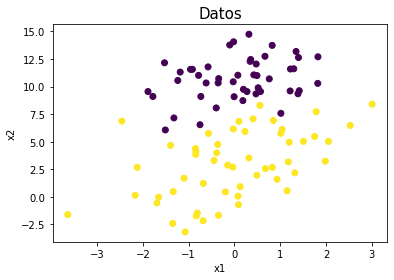

In [3]:
#Gráfica para visualizar los datos
X1 = datos.x1.values    #Con esto se forma un vector
X2 = datos.x2.values
X= datos.iloc[:,:-1].values
Y = datos.y.values 
plt.scatter(X1,X2,c=Y, label="Color en función de la etiqueta")  

plt.xlabel('x1'), plt.ylabel('x2')
plt.title('Datos', size=15)
plt.show()

In [4]:
def separacionDatos(X,Y,tamanhoTest=0.2): #Para el entrenamiento
    m = Y.size #Número de datos que tenemos (Puede ser X)
    
    #Tomo valores para el índice Test, cuantos van a test
    testTamanho = int(m*tamanhoTest)  #Por qué no nos puede tomar un valor flotante, son datos
    
    #Indices para el Test, te regresa los que usamos para test
    indicesTest = np.random.choice(m,testTamanho) #Elige aleatoriamente ciertos elementos, de esos m elementos de testTamanho
    
    #Indices para el entramiento, quito los del test y me quedo con los del entrenamiento
    indicesEntrenamiento = np.setdiff1d(np.arange(m),indicesTest)   #Nos hace como una resta de que elementos de una lista  no estan en la segunda lista
    
    
    #Separamos las datos en 4 grupos
    return X[indicesTest], Y[indicesTest], X[indicesEntrenamiento], Y[indicesEntrenamiento]


In [5]:
def sigmoide(X):
    return 1/(1 + np.exp(-X))

In [6]:
def funcionHipotesis(X,theta):
    return sigmoide(X @ theta)

In [7]:
def funcionDeCosto(X,Y,theta):
    h = funcionHipotesis(X,theta)
    izq = -Y*np.log(h)
    der = -(1-Y)*np.log(1-h)
    j = sum(izq + der)
    return j

In [8]:
def gradienteCosto(X,Y,theta):   #Para saber como es la pendiente en cada punto, para iterar de una manera acertada
    m = Y.size
    h = funcionHipotesis(X,theta)
    dj = ((h-Y)@ X)/m #Derivada de la función de costos
    return dj

In [9]:
def gradienteDescenso(X,Y,alpha, E= 0.001):
    m = Y.size
    X = np.hstack([np.ones([m,1]),X])
    n = X.shape[1]
    theta = np.zeros([n])
    
    costoAnterior = funcionDeCosto(X,Y,theta)
    theta = theta - alpha*gradienteCosto(X,Y,theta)
    costoActual = funcionDeCosto(X,Y,theta)
    
    diferencia = abs(costoActual - costoAnterior)
    
    iteraciones = [0,1]
    yCostos = [costoAnterior, costoActual]
    i = 2
    
    
    while diferencia > E: #Mientras no converga, es decir que la derivada sea diferente de cero
        costoAnterior = funcionDeCosto(X,Y,theta)
        theta = theta-alpha*gradienteCosto(X,Y,theta)
        costoActual = funcionDeCosto(X,Y,theta) #Volvemos a tomar la función
        
        diferencia = abs(costoActual - costoAnterior) 
        
        iteraciones.append(i) #Nuestra lista de contadores
        yCostos.append(costoActual)
        i = i+1
        
    plt.plot(iteraciones, yCostos)
    plt.title('Costos vs Iteraciones')
    plt.xlabel('Iteraciones')
    plt.ylabel('Costo')
    print('El último costo es: ', yCostos[-1])
    plt.show()
    
    return theta

El último costo es:  11.172240095203724


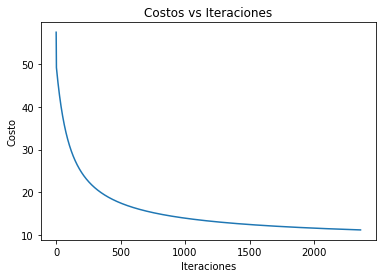

In [10]:
#Separación entre test y training
xTest, yTest, xEntrenamiento, yEntrenamiento =separacionDatos(X,Y)

alpha=0.1
#X = X.reshape([Y.size,1])  #Si hace falta rellenalo con uno
theta = gradienteDescenso(xEntrenamiento,yEntrenamiento, alpha)


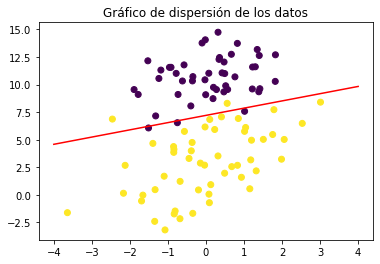

In [11]:
plt.scatter(X1,X2,c=Y)
plt.title("Gráfico de dispersión de los datos")
x = np.linspace(-4, 4, 3)
y = - (theta[0] + x * theta[1]) / theta[2]
plt.plot(x, y, 'r', label="Borde de decisión")
plt.show()

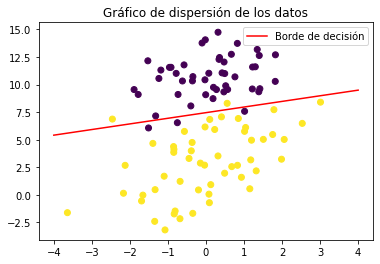

In [12]:
#Hacerlo desde sklearn 

from sklearn.linear_model import LogisticRegression

#X = datos['x1'].values.reshape(-1,1)
#Y = datos['x2'].values.reshape(-1,1)

#modeloLogistico = LogisticRegression(solver='liblinear',random_state=0) #
modeloLogistico = LogisticRegression(solver='lbfgs') #
modeloLogistico.fit(xEntrenamiento,yEntrenamiento) #Aquí lo entrenamos
yPredicha = modeloLogistico.predict(xTest) #Aquí vemos si ya salió 

theta0 = modeloLogistico.intercept_[0] #Theta uno
theta1 = modeloLogistico.coef_[0][0]   #Theta cero
theta2 = modeloLogistico.coef_[0][1]

#plt.scatter(datos['x1'],datos['x2'])
plt.scatter(X1,X2,c=Y)
plt.title("Gráfico de dispersión de los datos")
x = np.linspace(-4, 4, 3)
y = - (theta0 + x * theta1) / theta2
plt.plot(x, y, 'r', label="Borde de decisión")
plt.legend()
plt.show()